In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [2]:
from faker import Faker
import random
import pandas as pd

fake = Faker()

def generate_fake_data(num_samples):
    data = []
    for _ in range(num_samples):
        tweet = ' '.join(fake.paragraphs(nb=random.randint(1, 3)))  
        count = random.randint(1, 10)
        hate_speech_count = random.randint(0, count // 2)  
        offensive_language_count = random.randint(0, count) 
        neither_count = count - hate_speech_count #- offensive_language_count
        if hate_speech_count > 0:
            label = 0  
        elif offensive_language_count > 0:
            label = 1  
        else:
            label = 2 
        data.append((count, hate_speech_count, offensive_language_count, neither_count, label, tweet))
    return data

num_samples = 25000  
fake_data = generate_fake_data(num_samples)

columns = ['count', 'hate_speech_count', 'offensive_language_count', 'neither_count', 'class', 'tweet']
df = pd.DataFrame(fake_data, columns=columns)


In [3]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,7,0,4,7,1,Here machine too boy. Perhaps matter offer for...
1,2,1,0,1,0,Play big wear mind should major space. Wife pa...
2,1,0,1,1,1,Rich I seat father. Speech laugh play practice...
3,10,0,2,10,1,Get friend hair term find industry article dev...
4,10,3,8,7,0,Be dinner instead probably. Give rich wish soc...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     25000 non-null  int64 
 1   hate_speech_count         25000 non-null  int64 
 2   offensive_language_count  25000 non-null  int64 
 3   neither_count             25000 non-null  int64 
 4   class                     25000 non-null  int64 
 5   tweet                     25000 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,25000.0,5.49240,2.863723,1.0,3.0,5.0,8.0,10.0
hate_speech_count,25000.0,1.24676,1.296309,0.0,0.0,1.0,2.0,5.0
offensive_language_count,25000.0,2.75632,2.484268,0.0,1.0,2.0,4.0,10.0
neither_count,25000.0,4.24564,2.370858,1.0,2.0,4.0,6.0,10.0
class,25000.0,0.47944,0.678053,0.0,0.0,0.0,1.0,2.0


In [6]:
import matplotlib.pyplot as plt

# Distribution of target variable (assuming 'class' is your target variable)
print("\nDistribution of target variable:")
print(df['class'].value_counts())



Distribution of target variable:
0    15641
1     6732
2     2627
Name: class, dtype: int64


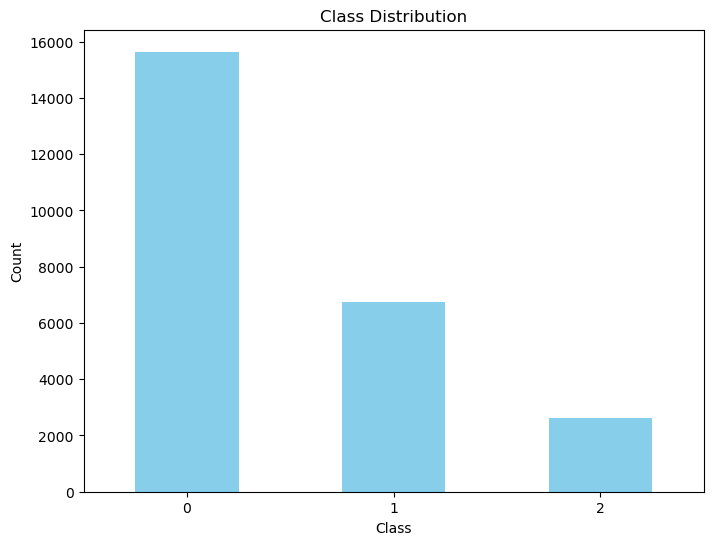

In [7]:
plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


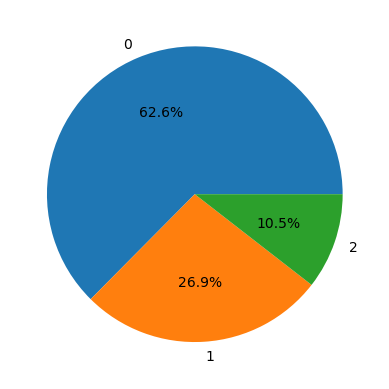

In [8]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [9]:
# Balancing the dataset
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1]
class_0 = df[df['class'] == 0].sample(n=8000)

In [10]:
balanced_df = pd.concat([ class_0,class_0, class_1, class_1, class_1, class_2, class_2, class_2, class_2, class_2, class_2], axis=0)

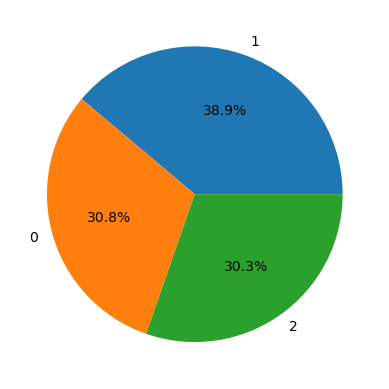

In [11]:
plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


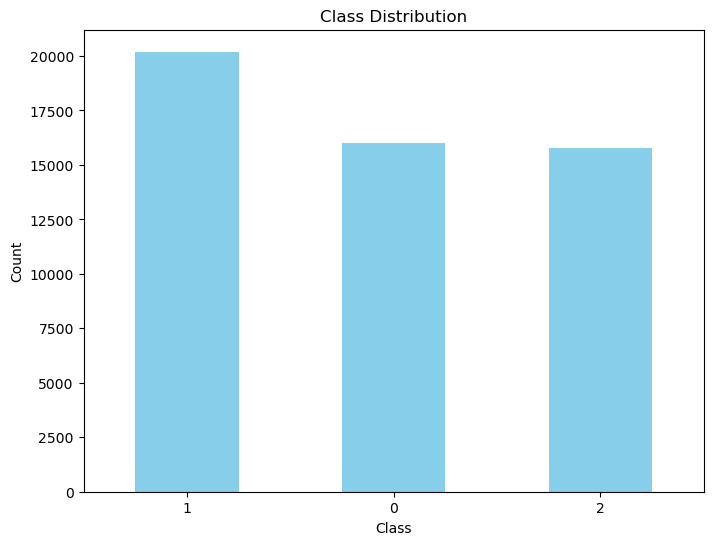

In [12]:
plt.figure(figsize=(8, 6))
balanced_df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [13]:
balanced_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
13682,9,4,1,5,0,Individual term care individual. Quite plan ea...
9817,5,2,2,3,0,Country drug Congress scene. End do blood forw...
24748,8,4,0,4,0,Dark half their number quality candidate.
14815,5,2,1,3,0,Woman character investment appear coach. Morni...
7882,7,2,6,5,0,Benefit be people great remember. Six long one...


In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

lemmatizer = WordNetLemmatizer()
def preprocess_tweet(text):
    cleaned_text = re.sub(r'@[A-Za-z0-9_]+|https?://[A-Za-z0-9./]+|[^a-zA-Z]', ' ', text)
    cleaned_text = cleaned_text.lower()
    tokens = word_tokenize(cleaned_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

In [15]:
balanced_df['processed_tweet'] = balanced_df['tweet'].apply(preprocess_tweet)

In [16]:
balanced_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,processed_tweet
13682,9,4,1,5,0,Individual term care individual. Quite plan ea...,individual term care individual quite plan eas...
9817,5,2,2,3,0,Country drug Congress scene. End do blood forw...,country drug congress scene end blood forward ...
24748,8,4,0,4,0,Dark half their number quality candidate.,dark half number quality candidate
14815,5,2,1,3,0,Woman character investment appear coach. Morni...,woman character investment appear coach mornin...
7882,7,2,6,5,0,Benefit be people great remember. Six long one...,benefit people great remember six long one pre...


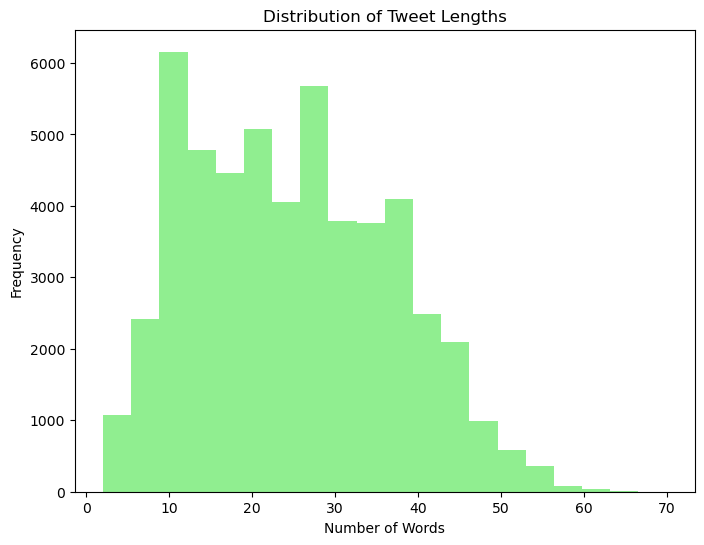

In [17]:
tweet_lengths = balanced_df['processed_tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(tweet_lengths, bins=20, color='lightgreen')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


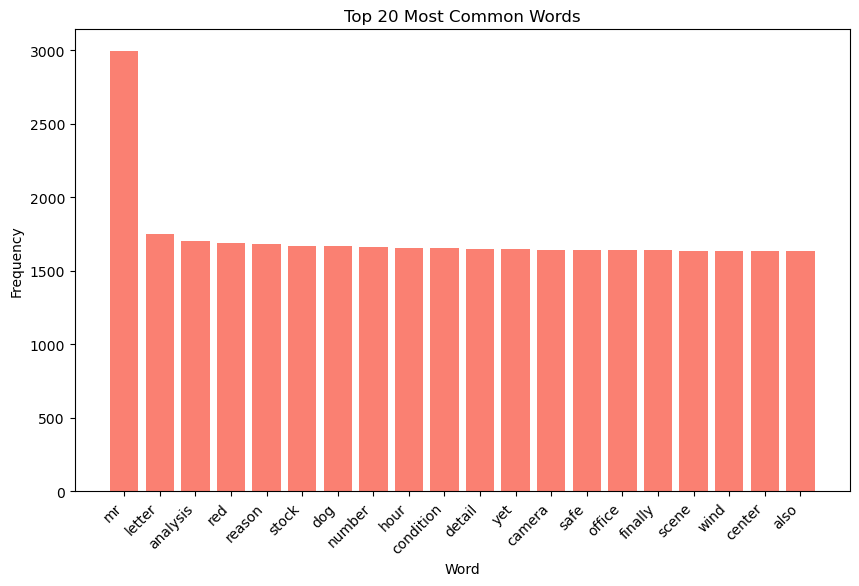

In [18]:
from collections import Counter

# Tokenize and count words
words = ' '.join(balanced_df['processed_tweet']).split()
word_counts = Counter(words)

# Plot the top N most common words
top_n = 20
top_words = word_counts.most_common(top_n)
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), [count for word, count in top_words], color='salmon')
plt.xticks(range(top_n), [word for word, count in top_words], rotation=45, ha='right')
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


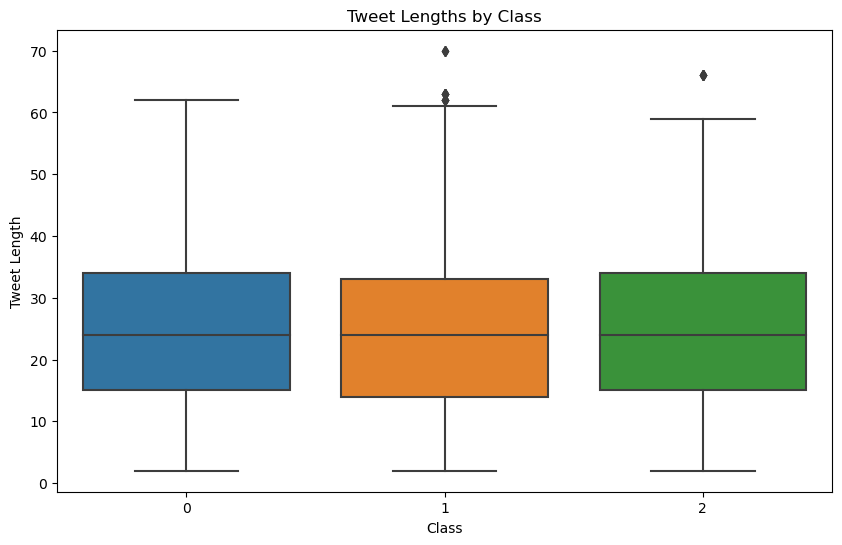

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y=tweet_lengths, data=balanced_df)
plt.title('Tweet Lengths by Class')
plt.xlabel('Class')
plt.ylabel('Tweet Length')
plt.show()


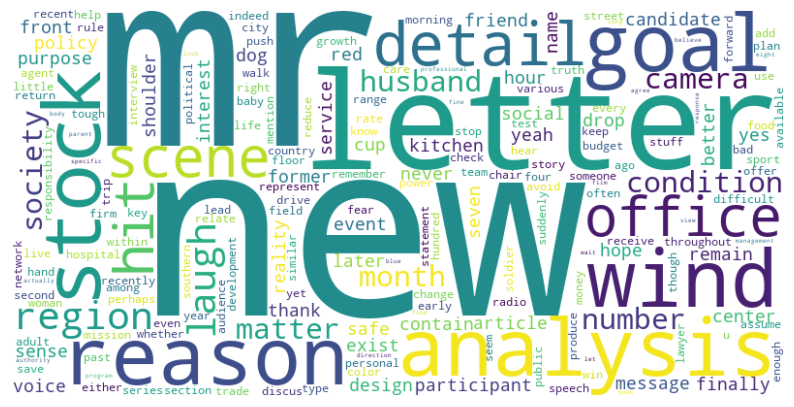

In [20]:
from wordcloud import WordCloud

# Concatenate all tweets into a single string
all_tweets = ' '.join(balanced_df['processed_tweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(balanced_df['processed_tweet']).toarray()
y = balanced_df['class']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=102)

In [23]:
print(X_train.shape, X_test.shape)

(36370, 867) (15588, 867)


In [24]:
print(y_train.shape, y_test.shape)

(36370,) (15588,)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Machine Learning Algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.40      0.27      0.32      4908
           1       0.44      0.58      0.50      6007
           2       0.41      0.39      0.40      4673

    accuracy                           0.42     15588
   macro avg       0.42      0.41      0.41     15588
weighted avg       0.42      0.42      0.41     15588



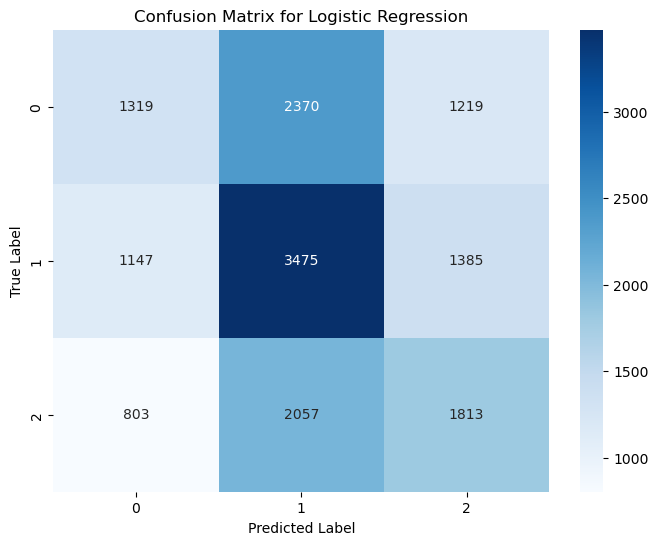

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4908
           1       0.88      0.95      0.91      6007
           2       0.99      1.00      0.99      4673

    accuracy                           0.93     15588
   macro avg       0.93      0.93      0.93     15588
weighted avg       0.93      0.93      0.93     15588



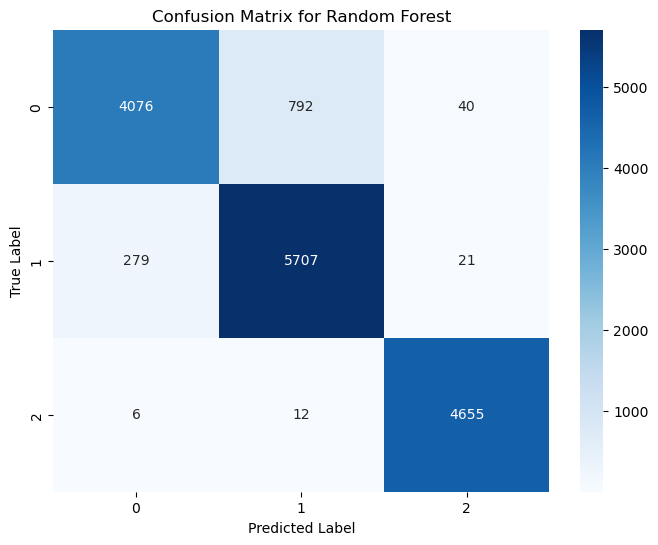

In [29]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC(kernel='linear')  
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))


In [ ]:
# Confusion Matrix for SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38      4908
           1       0.46      0.41      0.43      6007
           2       0.39      0.46      0.42      4673

    accuracy                           0.41     15588
   macro avg       0.41      0.41      0.41     15588
weighted avg       0.42      0.41      0.41     15588



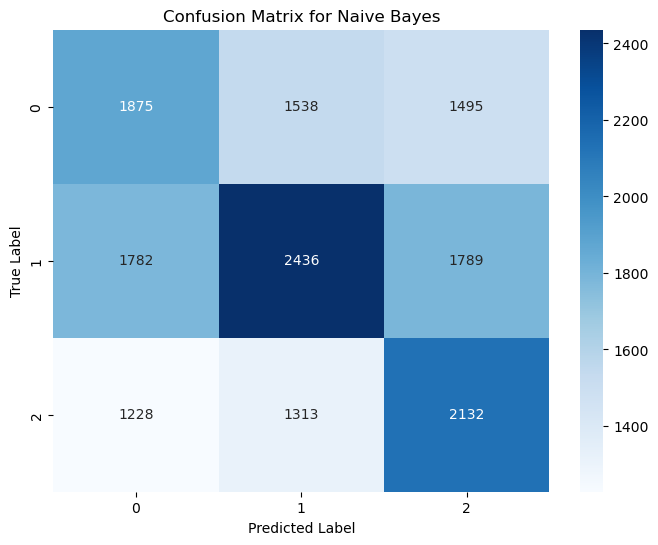

In [31]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [32]:
# Bagging Classifier
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)


In [33]:
# Classification report for Bagging Classifier
print("Classification Report for Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86      4908
           1       0.85      0.97      0.91      6007
           2       0.99      0.99      0.99      4673

    accuracy                           0.92     15588
   macro avg       0.93      0.92      0.92     15588
weighted avg       0.93      0.92      0.92     15588



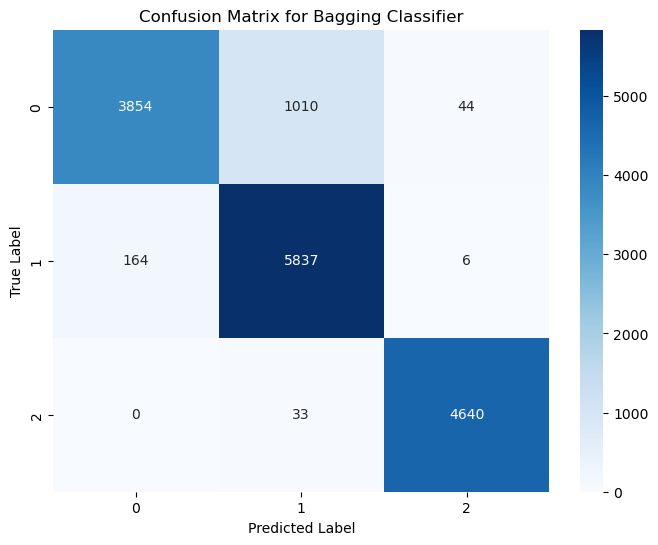

In [34]:
# Confusion Matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

In [35]:
# AdaBoost Classifier
adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

In [36]:
# Classification report for AdaBoost Classifier
print("Classification Report for AdaBoost Classifier:")
print(classification_report(y_test, y_pred_adaboost))

Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      4908
           1       0.88      0.96      0.92      6007
           2       0.99      1.00      0.99      4673

    accuracy                           0.93     15588
   macro avg       0.94      0.93      0.93     15588
weighted avg       0.93      0.93      0.93     15588



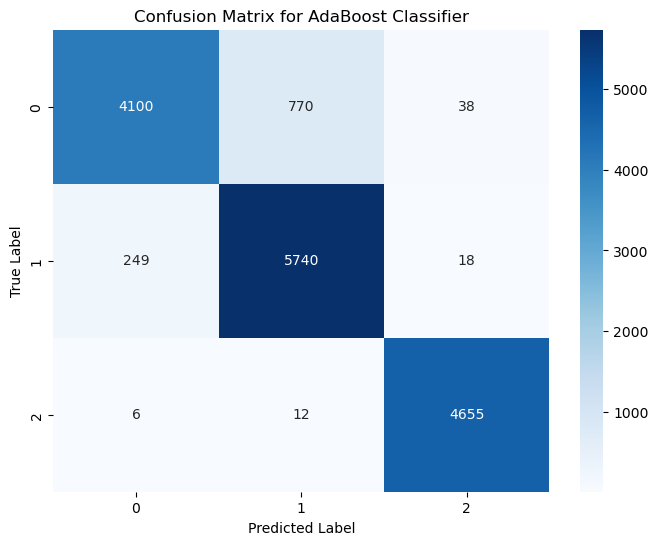

In [37]:
# Confusion Matrix for AdaBoost Classifier
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [41]:
# Voting Classifier
voting = VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('nb', MultinomialNB())], voting='soft')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

In [42]:
# Classification report for Voting Classifier
print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.96      0.75      0.85      4908
           1       0.85      0.97      0.90      6007
           2       0.95      0.99      0.97      4673

    accuracy                           0.91     15588
   macro avg       0.92      0.90      0.91     15588
weighted avg       0.91      0.91      0.90     15588



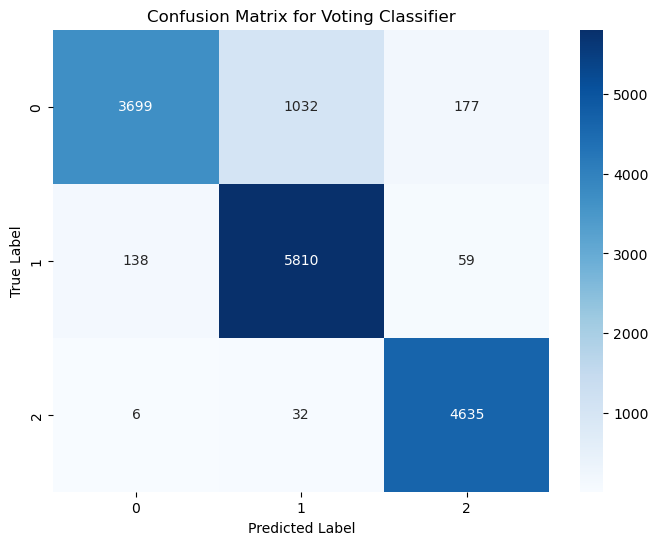

In [43]:
# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()


# DEEP LEARNING

In [44]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [45]:
# Splitting the dataset
X = balanced_df['processed_tweet']
y = balanced_df['class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=102)

In [46]:
# One-hot encoding
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

In [47]:
# Tokenizer
max_words = 15000
max_len = 600

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

In [48]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping with patience and monitoring validation loss
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0001)



In [49]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define ANN model
ann_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])


In [50]:
ann_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
print(ann_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 128)          1920000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1973763 (7.53 MB)
Trainable params: 1973763 (7.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

# Train ANN model
ann_history = ann_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                            epochs=15, batch_size=62, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/15


587/587 [==============================] - 121s 203ms/step - loss: 1.0660 - accuracy: 0.4243 - val_loss: 1.0320 - val_accuracy: 0.4584 - lr: 0.0010
Epoch 2/15
587/587 [==============================] - 120s 205ms/step - loss: 0.9649 - accuracy: 0.5231 - val_loss: 0.9577 - val_accuracy: 0.5081 - lr: 0.0010
Epoch 3/15
587/587 [==============================] - 121s 206ms/step - loss: 0.8493 - accuracy: 0.5904 - val_loss: 0.8727 - val_accuracy: 0.5660 - lr: 0.0010
Epoch 4/15
587/587 [==============================] - 124s 212ms/step - loss: 0.7308 - accuracy: 0.6527 - val_loss: 0.7925 - val_accuracy: 0.6113 - lr: 0.0010
Epoch 5/15
587/587 [==============================] - 125s 213ms/step - loss: 0.6343 - accuracy: 0.6989 - val_loss: 0.7041 - val_accuracy: 0.6576 - lr: 0.0010
Epoch 6/15
587/587 [==============================] - 128s 219ms/step - loss: 0.5481 - accuracy: 0.7363 - val_loss: 0.6616 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 7/15
587/587 [========================

In [53]:
# Predict probabilities for each class
y_pred_proba_ann = ann_model.predict(X_val_pad)

# Derive predicted classes
y_pred_ann = np.argmax(y_pred_proba_ann, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_val_encoded, y_pred_ann)

488/488 [==============================] - 20s 40ms/step


In [54]:
# Classification Report
class_report_ann = classification_report(y_val_encoded, y_pred_ann)

print("Confusion Matrix for ANN Model:")
print(conf_matrix_ann)
print("\nClassification Report for ANN Model:")
print(class_report_ann)


Confusion Matrix for ANN Model:
[[3799  831  278]
 [ 520 5412   75]
 [  17    6 4650]]

Classification Report for ANN Model:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4908
           1       0.87      0.90      0.88      6007
           2       0.93      1.00      0.96      4673

    accuracy                           0.89     15588
   macro avg       0.89      0.89      0.89     15588
weighted avg       0.89      0.89      0.89     15588



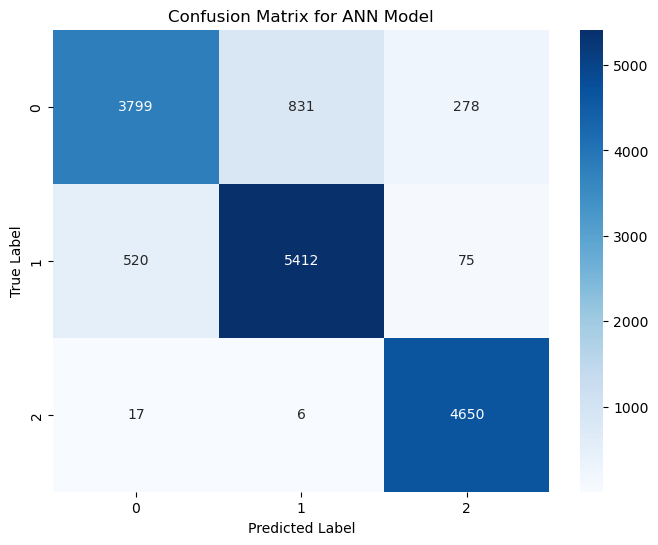

In [55]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for ANN Model')
plt.show()

In [56]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define CNN model
cnn_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [57]:

# Train CNN model
cnn_history = cnn_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                            epochs=20, batch_size=64, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/20
569/569 [==============================] - 11s 18ms/step - loss: 1.0336 - accuracy: 0.4515 - val_loss: 0.8563 - val_accuracy: 0.5907 - lr: 0.0010
Epoch 2/20
569/569 [==============================] - 10s 18ms/step - loss: 0.6339 - accuracy: 0.7148 - val_loss: 0.5460 - val_accuracy: 0.7564 - lr: 0.0010
Epoch 3/20
569/569 [==============================] - 10s 17ms/step - loss: 0.3869 - accuracy: 0.8476 - val_loss: 0.4321 - val_accuracy: 0.8344 - lr: 0.0010
Epoch 4/20
569/569 [==============================] - 10s 18ms/step - loss: 0.2502 - accuracy: 0.9114 - val_loss: 0.3723 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 5/20
569/569 [==============================] - 10s 18ms/step - loss: 0.1530 - accuracy: 0.9511 - val_loss: 0.3948 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 6/20
569/569 [==============================] - 10s 18ms/step - loss: 0.1027 - accuracy: 0.9687 - val_loss: 0.4045 - val_accuracy: 0.9127 - lr: 0.0010
Epoch 7/20
569/569 [==============================] - ETA:

In [58]:
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 32)           480000    
                                                                 
 conv1d (Conv1D)             (None, 596, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4768)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               610432    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [59]:
# Predict probabilities for each class
y_pred_proba_cnn = cnn_model.predict(X_val_pad)

# Derive predicted classes
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_val_encoded, y_pred_cnn)

488/488 [==============================] - 1s 2ms/step


In [60]:
# Classification Report
class_report_cnn = classification_report(y_val_encoded, y_pred_cnn)

print("Confusion Matrix for CNN Model:")
print(conf_matrix_ann)
print("\nClassification Report for CNN Model:")
print(class_report_cnn)


Confusion Matrix for CNN Model:
[[3799  831  278]
 [ 520 5412   75]
 [  17    6 4650]]

Classification Report for CNN Model:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4908
           1       0.85      0.89      0.87      6007
           2       0.95      0.98      0.97      4673

    accuracy                           0.88     15588
   macro avg       0.88      0.88      0.88     15588
weighted avg       0.88      0.88      0.88     15588



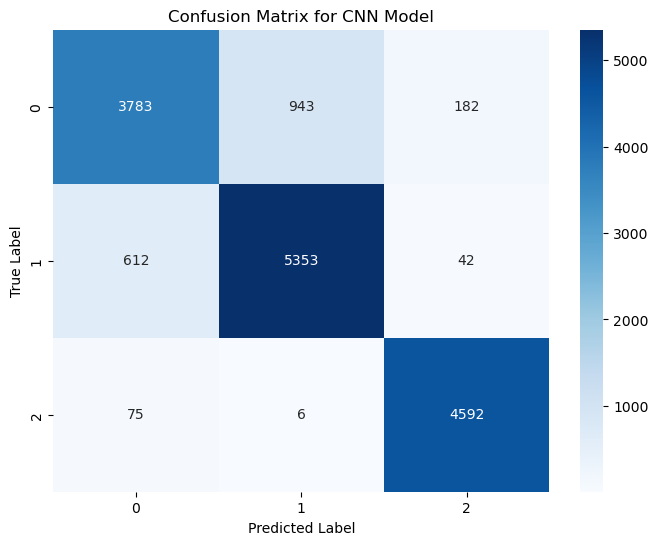

In [61]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()

In [62]:
from keras.layers import LSTM
# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])

In [63]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [64]:
# Train LSTM model
lstm_history = lstm_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                              epochs=15, batch_size=62, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/15
587/587 [==============================] - 120s 202ms/step - loss: 1.0557 - accuracy: 0.4385 - val_loss: 1.0178 - val_accuracy: 0.4704 - lr: 0.0010
Epoch 2/15
587/587 [==============================] - 117s 199ms/step - loss: 0.9262 - accuracy: 0.5421 - val_loss: 0.9228 - val_accuracy: 0.5348 - lr: 0.0010
Epoch 3/15
587/587 [==============================] - 119s 203ms/step - loss: 0.7865 - accuracy: 0.6253 - val_loss: 0.8167 - val_accuracy: 0.6080 - lr: 0.0010
Epoch 4/15
587/587 [==============================] - 120s 205ms/step - loss: 0.6500 - accuracy: 0.6985 - val_loss: 0.7139 - val_accuracy: 0.6643 - lr: 0.0010
Epoch 5/15
587/587 [==============================] - 120s 205ms/step - loss: 0.5275 - accuracy: 0.7591 - val_loss: 0.6545 - val_accuracy: 0.7043 - lr: 0.0010
Epoch 6/15
587/587 [==============================] - 118s 202ms/step - loss: 0.4310 - accuracy: 0.8103 - val_loss: 0.6157 - val_accuracy: 0.7421 - lr: 0.0010
Epoch 7/15
587/587 [==========================

In [69]:
# Predict probabilities for each class
y_pred_proba_lstm = lstm_model.predict(X_val_pad)

# Derive predicted classes
y_pred_lstm = np.argmax(y_pred_proba_lstm, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_lstm = confusion_matrix(y_val_encoded, y_pred_lstm)

488/488 [==============================] - 19s 39ms/step


In [70]:
class_report_lstm = classification_report(y_val_encoded, y_pred_lstm)
print("Confusion Matrix for LSTM Model:")
print(conf_matrix_lstm)
print("\nClassification Report for LSTM Model:")
print(class_report_lstm)

Confusion Matrix for LSTM Model:
[[3770  846  292]
 [ 502 5396  109]
 [  38   20 4615]]

Classification Report for LSTM Model:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      4908
           1       0.86      0.90      0.88      6007
           2       0.92      0.99      0.95      4673

    accuracy                           0.88     15588
   macro avg       0.89      0.88      0.88     15588
weighted avg       0.88      0.88      0.88     15588



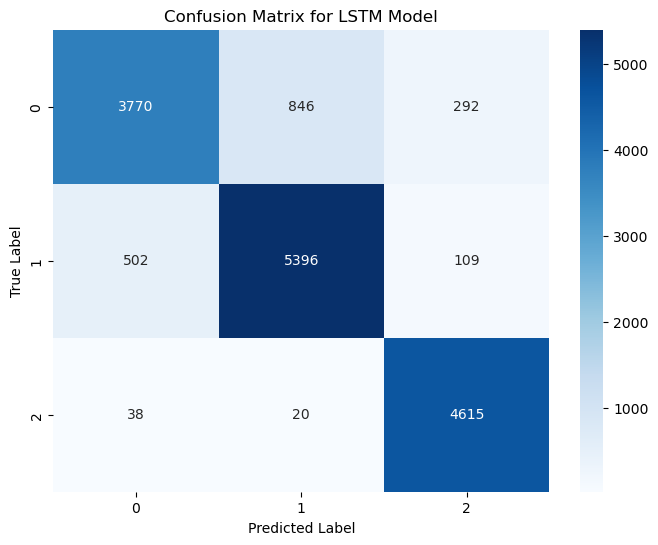

In [71]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LSTM Model')
plt.show()

In [72]:
from keras.layers import Bidirectional

# Define BiLSTM model
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 output classes
])


In [73]:
bilstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [74]:
# Train BiLSTM model
bilstm_history = bilstm_model.fit(X_train_pad, y_train_encoded, validation_data=(X_val_pad, y_val_encoded),
                                  epochs=15, batch_size=62, callbacks=[es, lr_reduction], verbose=1)


Epoch 1/15
587/587 [==============================] - 201s 337ms/step - loss: 1.0594 - accuracy: 0.4349 - val_loss: 1.0181 - val_accuracy: 0.4801 - lr: 0.0010
Epoch 2/15
587/587 [==============================] - 191s 326ms/step - loss: 0.9371 - accuracy: 0.5467 - val_loss: 0.9455 - val_accuracy: 0.5303 - lr: 0.0010
Epoch 3/15
587/587 [==============================] - 193s 328ms/step - loss: 0.8034 - accuracy: 0.6223 - val_loss: 0.8392 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/15
587/587 [==============================] - 190s 323ms/step - loss: 0.6641 - accuracy: 0.6943 - val_loss: 0.7302 - val_accuracy: 0.6590 - lr: 0.0010
Epoch 5/15
587/587 [==============================] - 193s 329ms/step - loss: 0.5439 - accuracy: 0.7520 - val_loss: 0.6493 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 6/15
587/587 [==============================] - 194s 330ms/step - loss: 0.4486 - accuracy: 0.8008 - val_loss: 0.6100 - val_accuracy: 0.7410 - lr: 0.0010
Epoch 7/15
587/587 [==========================

In [75]:
# Predict probabilities for each class
y_pred_proba_bilstm = bilstm_model.predict(X_val_pad)

# Derive predicted classes
y_pred_bilstm = np.argmax(y_pred_proba_bilstm, axis=1)

# Predictions
#y_pred_ann = ann_model.predict_classes(X_val_pad)

# Confusion Matrix
conf_matrix_bilstm = confusion_matrix(y_val_encoded, y_pred_bilstm)

488/488 [==============================] - 30s 61ms/step


In [76]:
class_report_bilstm = classification_report(y_val_encoded, y_pred_bilstm)
print("Confusion Matrix for BILSTM Model:")
print(conf_matrix_bilstm)
print("\nClassification Report for BILSTM Model:")
print(class_report_bilstm)

Confusion Matrix for BILSTM Model:
[[3727  816  365]
 [ 624 5283  100]
 [  48   11 4614]]

Classification Report for BILSTM Model:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4908
           1       0.86      0.88      0.87      6007
           2       0.91      0.99      0.95      4673

    accuracy                           0.87     15588
   macro avg       0.87      0.88      0.87     15588
weighted avg       0.87      0.87      0.87     15588



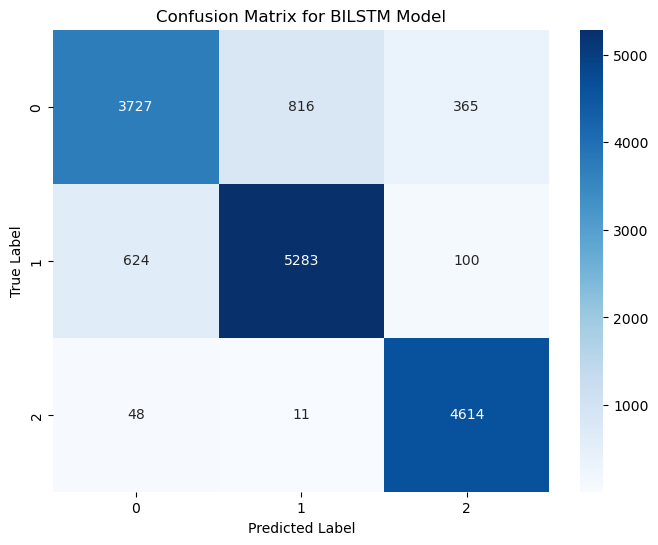

In [77]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bilstm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for BILSTM Model')
plt.show()

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

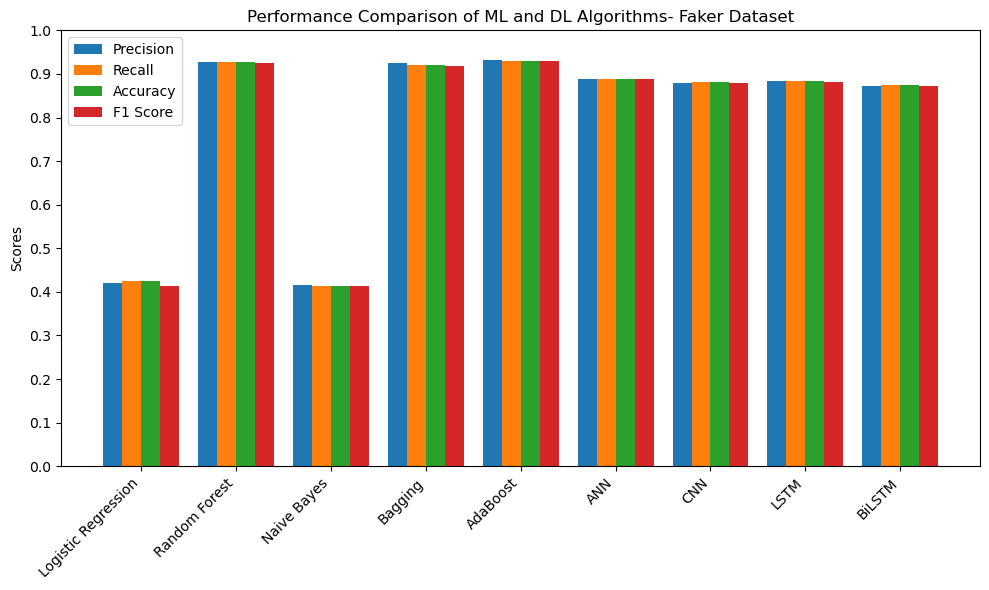

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Define evaluation metrics
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']

# Define models and their corresponding scores
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Bagging', 'AdaBoost', 'ANN', 'CNN', 'LSTM', 'BiLSTM']
precision_scores = [precision_score(y_test, y_pred_lr, average='weighted'),
                    precision_score(y_test, y_pred_rf, average='weighted'),
                    
                    precision_score(y_test, y_pred_nb, average='weighted'),
                    precision_score(y_test, y_pred_bagging, average='weighted'),
                    precision_score(y_test, y_pred_adaboost, average='weighted'),
                    precision_score(y_val_encoded, y_pred_ann, average='weighted'),
                    precision_score(y_val_encoded, y_pred_cnn, average='weighted'),
                    precision_score(y_val_encoded, y_pred_lstm, average='weighted'),
                    precision_score(y_val_encoded, y_pred_bilstm, average='weighted')]
recall_scores = [recall_score(y_test, y_pred_lr, average='weighted'),
                 recall_score(y_test, y_pred_rf, average='weighted'),
                 recall_score(y_test, y_pred_nb, average='weighted'),
                 recall_score(y_test, y_pred_bagging, average='weighted'),
                recall_score(y_test, y_pred_adaboost, average='weighted'),
                 recall_score(y_val_encoded, y_pred_ann, average='weighted'),
                 recall_score(y_val_encoded, y_pred_cnn, average='weighted'),
                 recall_score(y_val_encoded, y_pred_lstm, average='weighted'),
                 recall_score(y_val_encoded, y_pred_bilstm, average='weighted')]
accuracy_scores = [accuracy_score(y_test, y_pred_lr),
                   accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_bagging),
                   accuracy_score(y_test, y_pred_adaboost),
                   accuracy_score(y_val_encoded, y_pred_ann),
                   accuracy_score(y_val_encoded, y_pred_cnn),
                   accuracy_score(y_val_encoded, y_pred_lstm),
                   accuracy_score(y_val_encoded, y_pred_bilstm)]
f1_scores = [f1_score(y_test, y_pred_lr, average='weighted'),
             f1_score(y_test, y_pred_rf, average='weighted'),
             f1_score(y_test, y_pred_nb, average='weighted'),
             f1_score(y_test, y_pred_bagging, average='weighted'),
             f1_score(y_test, y_pred_adaboost, average='weighted'),
             f1_score(y_val_encoded, y_pred_ann, average='weighted'),
             f1_score(y_val_encoded, y_pred_cnn, average='weighted'),
             f1_score(y_val_encoded, y_pred_lstm, average='weighted'),
             f1_score(y_val_encoded, y_pred_bilstm, average='weighted')]

# Plotting
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, precision_scores, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recall_scores, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, accuracy_scores, width, label='Accuracy')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of ML and DL Algorithms- Faker Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()


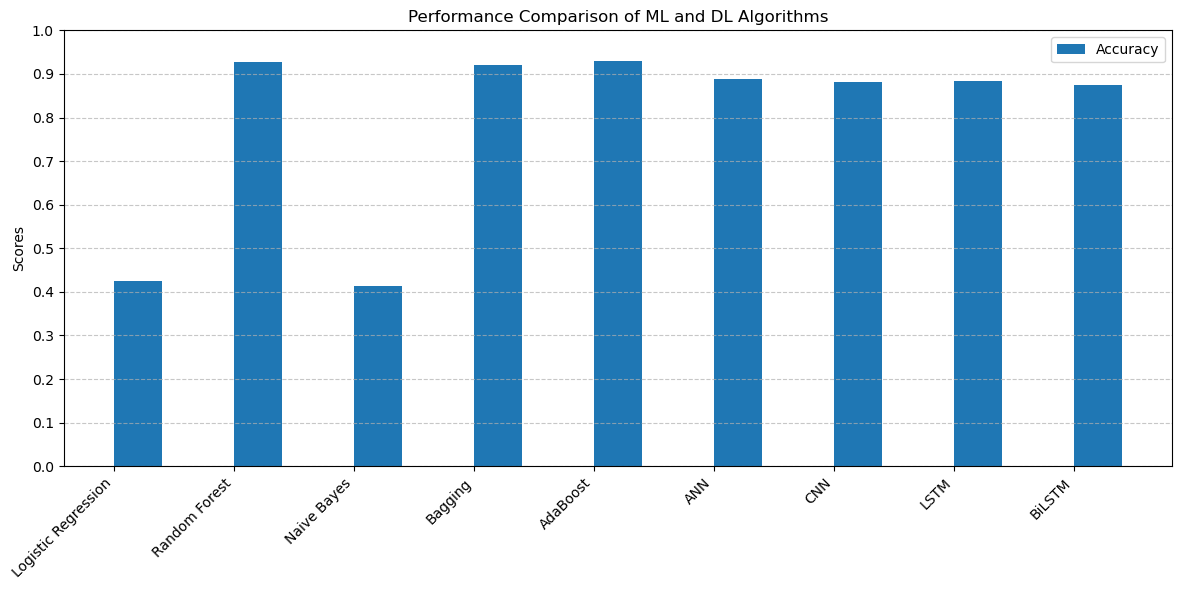

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Define evaluation metrics
metrics = ['Accuracy']

# Define models and their corresponding scores
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Bagging', 'AdaBoost', 'ANN', 'CNN', 'LSTM', 'BiLSTM']

accuracy_scores = [accuracy_score(y_test, y_pred_lr),
                   accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_bagging),
                   accuracy_score(y_test, y_pred_adaboost),
                   accuracy_score(y_val_encoded, y_pred_ann),
                   accuracy_score(y_val_encoded, y_pred_cnn),
                   accuracy_score(y_val_encoded, y_pred_lstm),
                   accuracy_score(y_val_encoded, y_pred_bilstm)]


# Plotting
x = np.arange(len(models))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

rects3 = ax.bar(x + 0.5*width, accuracy_scores, width, label='Accuracy')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of ML and DL Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.yticks(np.arange(0, 1.1, 0.1))
plt.tight_layout()
plt.show()


In [84]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
lemmatizer = WordNetLemmatizer()

# Function to preprocess the tweet
def preprocess_tweet(text):
    cleaned_text = re.sub(r'@[A-Za-z0-9_]+|https?://[A-Za-z0-9./]+|[^a-zA-Z]', ' ', text)
    cleaned_text = cleaned_text.lower()
    tokens = word_tokenize(cleaned_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text

# Function to predict tweet class using ML and DL models
def predict_tweet_class(tweet):
    processed_tweet = preprocess_tweet(tweet)
    
    # TF-IDF vectorization
    processed_tweet_tfidf = tfidf_vectorizer.transform([processed_tweet]).toarray()
    
    # Tokenization and padding for DL models
    processed_tweet_seq = tokenizer.texts_to_sequences([processed_tweet])
    processed_tweet_pad = pad_sequences(processed_tweet_seq, maxlen=max_len)
    
    # Make predictions using ML models
    ml_predictions = {
        'Logistic Regression': lr.predict(processed_tweet_tfidf)[0],
        'Random Forest': rf.predict(processed_tweet_tfidf)[0],
        'Naive Bayes': nb.predict(processed_tweet_tfidf)[0],
        'Bagging': bagging.predict(processed_tweet_tfidf)[0],
        'AdaBoost': adaboost.predict(processed_tweet_tfidf)[0]
    }
    
    # Make predictions using DL models
    dl_predictions = {
        'LSTM': np.argmax(lstm_model.predict(processed_tweet_pad), axis=1)[0],
        'ANN': np.argmax(ann_model.predict(processed_tweet_pad), axis=1)[0],
        'CNN': np.argmax(cnn_model.predict(processed_tweet_pad), axis=1)[0],
        'BiLSTM': np.argmax(bilstm_model.predict(processed_tweet_pad), axis=1)[0]
    }
    
    # Combine predictions from all models
    all_predictions = list(ml_predictions.values()) + list(dl_predictions.values())
    
    # Determine the final prediction based on majority voting
    final_prediction = max(Counter(all_predictions), key=Counter(all_predictions).get)
    
    # Check if the predicted class is offensive or hate
    block_user = False
    if final_prediction in [0, 1]:
        block_user = True
        if final_prediction == 0:
            print("User blocked for posting hate content.")
        else:
            print("User blocked for posting offensive content.")


    return {
        'ML Predictions': ml_predictions,
        'DL Predictions': dl_predictions,
        'Final Prediction': final_prediction,
        'Block User': block_user
    }

# Example usage
user_tweet = input("Enter your tweet: ")
prediction_result = predict_tweet_class(user_tweet)
print("ML Predictions:", prediction_result['ML Predictions'])
print("DL Predictions:", prediction_result['DL Predictions'])
print("Final Prediction:", prediction_result['Final Prediction'])
print("Block User:", prediction_result['Block User'])


Enter your tweet: i will kill you
1/1 [==============================] - 0s 62ms/step
User blocked for posting offensive content.
ML Predictions: {'Logistic Regression': 1, 'Random Forest': 1, 'Naive Bayes': 2, 'Bagging': 1, 'AdaBoost': 1}
DL Predictions: {'LSTM': 1, 'ANN': 1, 'CNN': 2, 'BiLSTM': 1}
Final Prediction: 1
Block User: True
